### Impoprt Liabraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


### Dataset Uploading

In [3]:
data=pd.read_csv('fashion-mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [5]:
data.shape

(60000, 785)

In [6]:
x_train = data.iloc[:, 1:]
y_train = data.iloc[:, 0]


In [7]:
x_train.shape

(60000, 784)

In [8]:
y_train.shape

(60000,)

In [9]:
data2=pd.read_csv('fashion-mnist_test.csv')

In [10]:
data2.shape

(10000, 785)

In [11]:
data2.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_test=data2.iloc[:,1:]
y_test=data2.iloc[:,0]

In [13]:
x_test.shape

(10000, 784)

In [14]:
y_test.shape

(10000,)

In [15]:
from tensorflow.keras.utils import plot_model,to_categorical

In [16]:
import numpy as np


In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Model Training

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.optimizers import Adam


In [25]:
y_train_c=to_categorical(y_train,num_classes=10)
y_test_c=to_categorical(y_test,num_classes=10)

In [26]:
model=Sequential()
model.add(Dense(500,activation='relu',input_shape=(784,)))
model.add(Dense(150,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_c,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 13ms/step - loss: 3.1464 - accuracy: 0.7533
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6918 - accuracy: 0.8200
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4653 - accuracy: 0.8478
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3973 - accuracy: 0.8621
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3638 - accuracy: 0.8711
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3405 - accuracy: 0.8776
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3303 - accuracy: 0.8808
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3160 - accuracy: 0.8856
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3143 - accuracy: 0.8871
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3203 - accura

In [28]:
model.evaluate(x_test,y_test_c)

313/313 [==============================] - 2s 5ms/step - loss: 0.3554 - accuracy: 0.8771


[0.3553794324398041, 0.8770999908447266]

In [29]:
H=model.fit(x_train,y_train_c,epochs=10,batch_size=256,validation_data=(x_test,y_test_c))

Epoch 1/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2509 - accuracy: 0.9076 - val_loss: 0.3278 - val_accuracy: 0.8901
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2331 - accuracy: 0.9133 - val_loss: 0.3376 - val_accuracy: 0.8867
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2310 - accuracy: 0.9146 - val_loss: 0.3476 - val_accuracy: 0.8805
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2319 - accuracy: 0.9137 - val_loss: 0.3846 - val_accuracy: 0.8735
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2319 - accuracy: 0.9140 - val_loss: 0.3644 - val_accuracy: 0.8795
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2342 - accuracy: 0.9119 - val_loss: 0.3664 - val_accuracy: 0.8810
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2383 - accuracy: 0.9118 - val_loss: 0.3585 - val_accuracy: 0.8867

### Accuracy is 91% for training set
### Accuracy is 88% for validation set

In [30]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

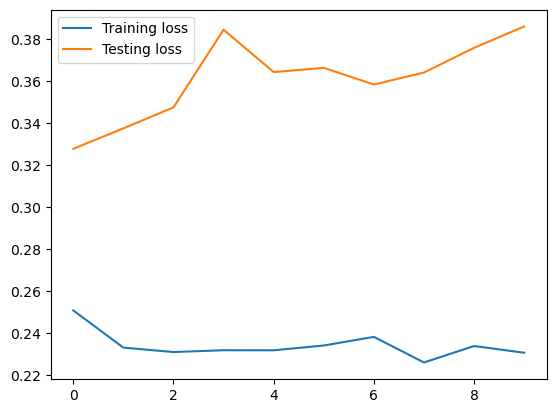

In [31]:
plt.plot(H.history['loss'],label='Training loss')
plt.plot(H.history['val_loss'],label='Testing loss')
plt.legend()
plt.show()

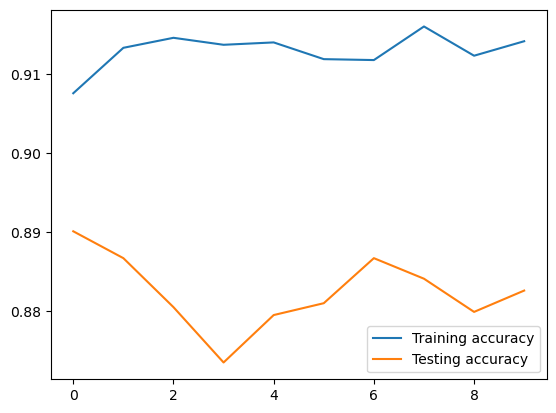

In [32]:
plt.plot(H.history['accuracy'],label='Training accuracy')
plt.plot(H.history['val_accuracy'],label='Testing accuracy')
plt.legend()
plt.show()